In [ ]:
"""
Task 1A – bias identification of the direct matcher

- Gender bias?
- Age bias?
- Location bias?
- Educational background bias?
- Look at the matcher outcome: see if the candidates proposed for the jobs follow some kind of skewed distribution

Task 1B – bias identification of the indirect matcher

- Look at the job suggested to the candidates
- Look if for candidates which are comparable in terms of educational background

"""

'ToDo:\n1 compute percentage on the whole dataset to compare with the smaller one\n2 compute valuecounts for different dataset\n3 find pattern\n\n----\n\ndividere per numero vero di candidati\n\n'


Il dataset (i due dataset in realtà) sono il risultato di un algoritmo che fa il matching tra posizioni di lavoro disponibili e potenziali candidati. Tale matching è fatto da un algoritmo proprietario di Adecco (a cui non abbiamo accesso); il dataset è in pratica l'output di questo algoritmo.
Come categoria più generale, questo algoritmo (ed i relativi dataset) rientrano nella categoria Human Resources (HR).


Il problema da affrontare è duplice: 1) studiare se sia presente un qualche tipo di bias nei dati (bias detection) e, in caso affermativo, 2) applicare tecniche per la rimozione/mitigazione del bias.
Tenete conto che siete i primi a guardare sistematicamente questo dataset quindi non sappiamo esattamente cosa troverete.


============================================================

Task 1A – bias identification of the direct matcher
- Gender bias?
- Age bias?
- Location bias?
- Educational background bias?
- Look at the matcher outcome: see if the candidates proposed for the jobs follow some kind of skewed distribution  

Task 1B – bias identification of the indirect matcher
- Look at the job suggested to the candidates
- Look if for candidates which are comparable in terms of educational background

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
cwd = os.getcwd()

In [ ]:
dataset_details = pd.read_excel(cwd+'/Dataset details.xlsx')
dataset_details.head(dataset_details.shape[0])

,Column,Description
0,cand_id,Candidate identifier
1,job_id,Job position identifier
2,distance_km,Distance (km) between candidate domicile and w...
3,match_score,Score provided by matching algorithm [0-100]. ...
4,direct_match_rank,Rank based on match_score
5,cand_gender,"Candidate gender [Male,Female]"
6,cand_age_bucket,"Candidate age bucket [""15-24"", ""25-34"", ""35-44..."
7,cand_domicile_province,Candidate domicile province abbreviation
8,cand_domicile_region,Candidate domicile region
9,cand_education,Candidate list of educational qualifications


## Direct Matching Dataset

In [ ]:
direct_matching_df = pd.read_csv(cwd+'/direct_matching_20240213.csv', sep=';')

In [ ]:
len(np.unique(direct_matching_df.cand_education.dropna().values))

433

In [ ]:
direct_matching_df.head()

,cand_id,job_id,distance_km,match_score,match_rank,cand_gender,cand_age_bucket,cand_domicile_province,cand_domicile_region,cand_education,cand_languages_spoken,job_contract_type,job_professional_category,job_sector,job_work_province
0,"5,664,912",OFF_1011_1427,32.327042,99.573387,1,Male,45-54,UD,FRIULI VENEZIA GIULIA,NaN,NaN,Lavoro subordinato,Geometra e tecnico di costruzioni civili e ind...,Progettisti / Design / Grafici,UD
1,"4,999,120",OFF_1011_1427,15.595593,99.210564,2,Male,35-44,UD,FRIULI VENEZIA GIULIA,NaN,NaN,Lavoro subordinato,Geometra e tecnico di costruzioni civili e ind...,Progettisti / Design / Grafici,UD
2,"5,413,671",OFF_1011_1427,31.348877,99.118614,3,Female,45-54,UD,FRIULI VENEZIA GIULIA,NaN,NaN,Lavoro subordinato,Geometra e tecnico di costruzioni civili e ind...,Progettisti / Design / Grafici,UD
3,"5,965,090",OFF_1011_1427,66.315598,97.409767,4,Male,15-24,TS,FRIULI VENEZIA GIULIA,NaN,NaN,Lavoro subordinato,Geometra e tecnico di costruzioni civili e ind...,Progettisti / Design / Grafici,UD
4,"5,771,219",OFF_1011_1427,15.595593,97.323875,5,Female,35-44,UD,FRIULI VENEZIA GIULIA,NaN,NaN,Lavoro subordinato,Geometra e tecnico di costruzioni civili e ind...,Progettisti / Design / Grafici,UD


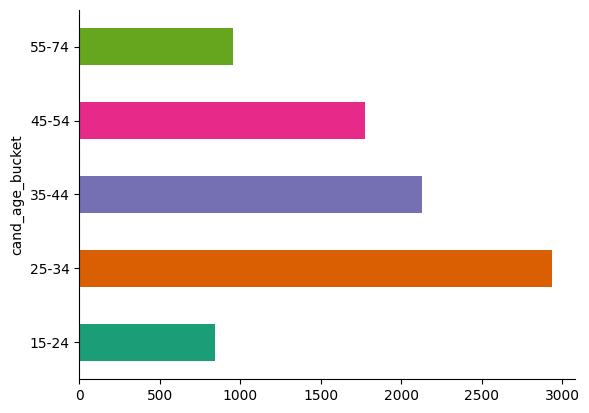

In [ ]:
# @title cand_age_bucket

from matplotlib import pyplot as plt
import seaborn as sns
direct_matching_df.groupby('cand_age_bucket').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

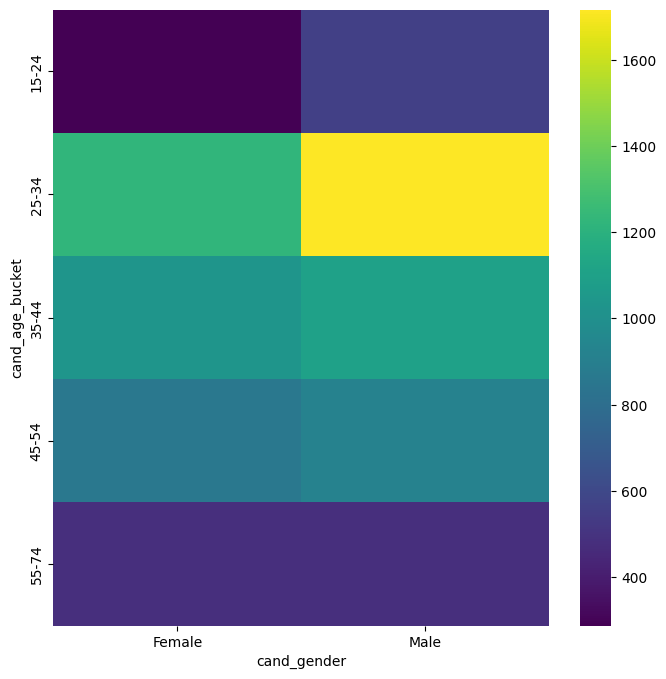

In [ ]:
# @title cand_gender vs cand_age_bucket

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['cand_age_bucket'].value_counts()
    for x_label, grp in direct_matching_df.groupby('cand_gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('cand_gender')
_ = plt.ylabel('cand_age_bucket')

In [ ]:
direct_matching_df.cand_age_bucket.unique()

array(['45-54', '35-44', '15-24', '55-74', '25-34', nan], dtype=object)

In [ ]:
direct_matching_df.describe(include="all")

,cand_id,job_id,distance_km,match_score,match_rank,cand_gender,cand_age_bucket,cand_domicile_province,cand_domicile_region,cand_education,cand_languages_spoken,job_contract_type,job_professional_category,job_sector,job_work_province
count,8647,8647,8647.000000,8647.000000,8647.000000,8647,8646,8644,8642,2341,2355,8647,8647,8647,8647
unique,6798,865,NaN,NaN,NaN,2,5,79,18,433,96,3,247,26,53
top,"6,550,205",OFF_1011_1427,NaN,NaN,NaN,Male,25-34,MI,LOMBARDIA,Licenza media,Rumeno,Lavoro subordinato,Operaio Generico Metalmeccanico,Operai Generici,MI
freq,18,10,NaN,NaN,NaN,4766,2936,1341,3989,433,821,5658,770,2829,1689
mean,NaN,NaN,29.769432,99.633988,5.499480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,23.493063,1.071380,2.872447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,69.610825,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,12.253924,99.676991,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,23.447361,99.856033,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,41.754654,99.932602,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fill NaN with some default values just to test bias

In [ ]:
direct_matching_df['cand_languages_spoken'] = direct_matching_df['cand_languages_spoken'].fillna('Italiano')
direct_matching_df['cand_education'] = direct_matching_df['cand_education'].fillna('no education')

In [ ]:
mask_candidates_w_edu = direct_matching_df['cand_education'].isnull()
mask_candidates_w_lang = direct_matching_df['cand_languages_spoken'].isnull()

equal = 0
for education,language in zip(mask_candidates_w_edu,mask_candidates_w_lang):
  if education and education == language:
    equal+=1
print(f"candidates without education and language {equal}")
print(f"candidates without education {mask_candidates_w_edu.sum()}")
print(f"candidates without language {mask_candidates_w_lang.sum()}")

candidates without education and language 5544
candidates without education 6306
candidates without language 6292


In [ ]:
def get_series_for_column(dataframe,name_col):
  return dataframe[name_col].value_counts()

In [ ]:
candidates_with_education = direct_matching_df[~mask_candidates_w_edu]
gender_with_edu = get_series_for_column(candidates_with_education,"cand_gender")
gender_without_edu = get_series_for_column(direct_matching_df[mask_candidates_w_edu],"cand_gender")
gender_with_edu,gender_without_edu

(cand_gender
 Male      1578
 Female     763
 Name: count, dtype: int64,
 cand_gender
 Male      3188
 Female    3118
 Name: count, dtype: int64)

## Possible struct dictionary cand_education:
- key: row number
- value: tuple(title)

In [ ]:
education_mapping = {
    'no education' : 0,
    'licenza elementare': 1,
    'elementari': 2,
    'licenza media': 3,
    'diploma / accademia': 4,
    'qualifica / attestato': 5,
    'istituto tecnico superiore (its)': 6,
    'laurea triennale': 7,
    'master universitario': 8,
    'laurea magistrale': 9,
    'dottorato di ricerca': 10,
}

reverse_education_mapping = {value: key for key, value in education_mapping.items()}

education_counter_total = {}
education_counter_max = {}
for edu in education_mapping.keys():
  education_counter_max[edu] = 0
  education_counter_total[edu] = 0

In [ ]:
df_without_nulls = direct_matching_df.dropna()

education_lvl = df_without_nulls.cand_education
row_to_education = {}
set_education = set()

### Dictionary containing row in which the candidate appear-education ###
for idx,edu in education_lvl.items():
  if ";" in edu:
    qualifications = edu.split(";")
  else:
    qualifications = [edu]
  title = []
  for level in qualifications:
    if ":" in level:

      new_value = level.split(":")[0].strip().lower()
    else:
      new_value = level.strip().lower()
    title.append(new_value)
    set_education.add(new_value)

    #For counting
    education_counter_total[new_value] += 1
    #field.append(level.split(":")[1])

  row_to_education[idx] = title #(title,field)
for i in row_to_education.values():
  print(i)

### The loop below is used to retain only the highest education in the CV according to the dictionary above (may be wrong) ###
for row, education in row_to_education.items():
  mapped_value = []
  if len(education) > 1:
    for title in education:
      mapped_value.append(education_mapping[title])
    max_lvl_education = max(mapped_value)
    new_education = reverse_education_mapping[max_lvl_education]

    education_counter_max[new_education] += 1
    row_to_education[row] = [new_education]
  else:
    education_counter_max[education[0]] += 1

education_counter_total['licenza elementare'] += education_counter_total['elementari']
del education_counter_total['elementari']  # same name for the 2 values

education_counter_max['licenza elementare'] += education_counter_max['elementari']
del education_counter_max['elementari']

In [ ]:
education_counter_total,sum(education_counter_max.values())

({'no education': 6298,
  'licenza elementare': 22,
  'licenza media': 504,
  'diploma / accademia': 1138,
  'qualifica / attestato': 507,
  'istituto tecnico superiore (its)': 169,
  'laurea triennale': 182,
  'master universitario': 33,
  'laurea magistrale': 200,
  'dottorato di ricerca': 5},
 8639)

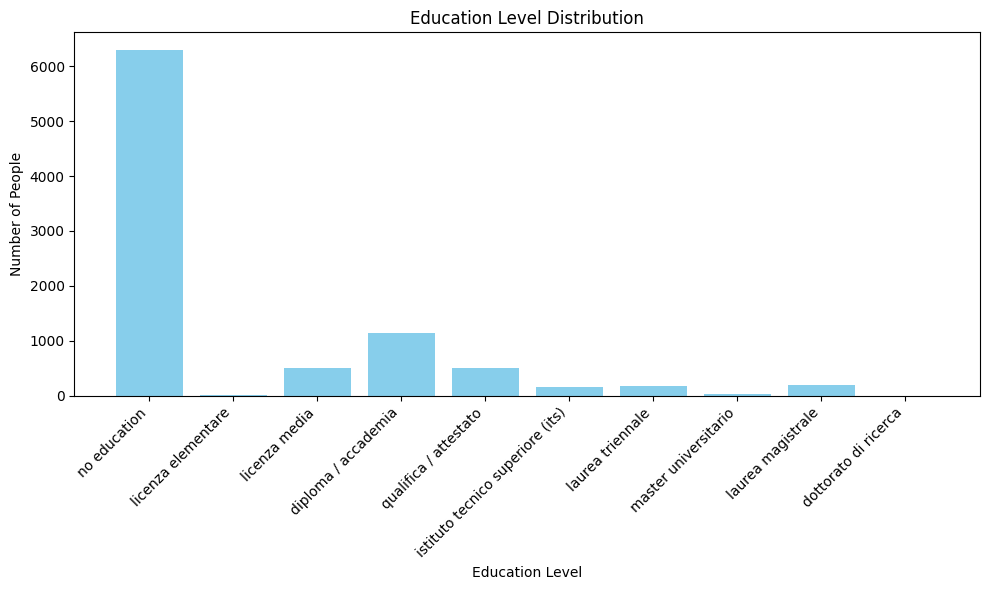

In [ ]:
education_levels = list(education_counter_total.keys())
count_values = list(education_counter_total.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(education_levels, count_values, color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Number of People')
plt.title('Education Level Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

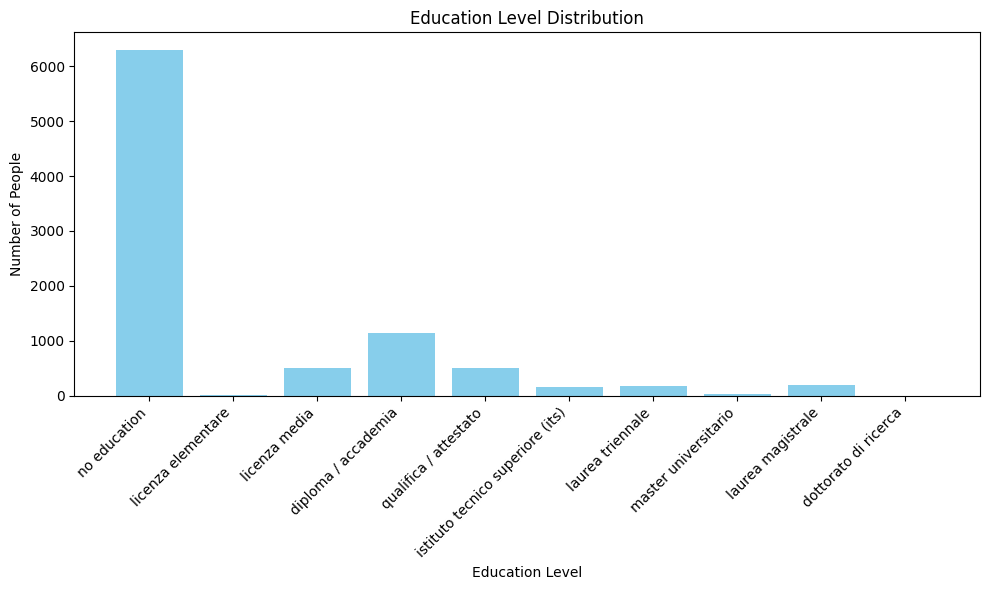

In [ ]:
education_levels = list(education_counter_total.keys())
count_values = list(education_counter_total.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(education_levels, count_values, color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Number of People')
plt.title('Education Level Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Languages

In [ ]:
languages_spoken = df_without_nulls.cand_languages_spoken
counter_languages = {}
set_languages = set()
### Dictionary containing row in which the candidate appear-language ###
for idx,langs in languages_spoken.items():
  if ";" in langs:
    languages = langs.split(";")
  else:
    languages = [langs]

  for lang in languages:
      new_lang = lang.strip().lower()
      set_languages.add(new_lang)
      if new_lang in counter_languages:
        counter_languages[new_lang] += 1
      else:
        counter_languages[new_lang] = 1

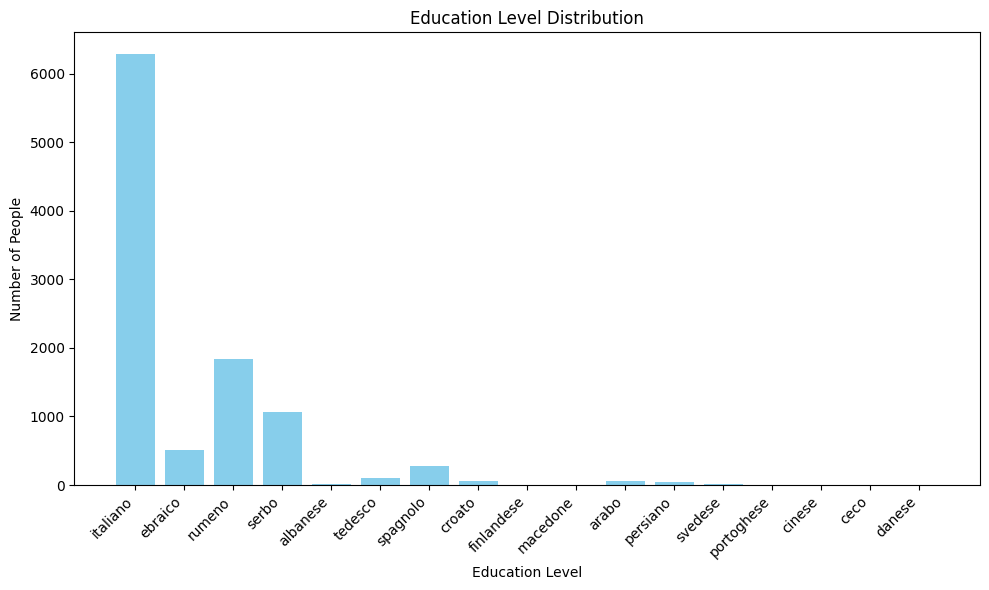

In [ ]:
languages_levels = list(counter_languages.keys())
count_languages = list(counter_languages.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(languages_levels, count_languages, color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Number of People')
plt.title('Education Level Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
print('Number of unique jobs:',direct_matching_df.job_id.nunique())
print('Number of unique candidates:',direct_matching_df.cand_id.nunique()) #some candidates are eligible for more than 1 job


Number of unique jobs: 865
Number of unique candidates: 6798


## Analysis on top x candidates

In [100]:
def get_rank_n_candidates(dataset, match_rank):
  return dataset[dataset['match_rank'] == match_rank]

#best_candidates[best_candidates['cand_gender']=='Male'].shape[0],best_candidates[best_candidates['cand_gender']!='Male'].shape[0]

## Replace education with max level

In [ ]:
#df = direct_matching_df.copy()
for idx, edu in row_to_education.items():
  direct_matching_df.cand_education.loc[idx] = edu[0]

In [102]:
top_1_cands = get_rank_n_candidates(direct_matching_df,1)
top_2_cands = get_rank_n_candidates(direct_matching_df,2)
top_3_cands = get_rank_n_candidates(direct_matching_df,3)
top_4_cands = get_rank_n_candidates(direct_matching_df,4)
top_5_cands = get_rank_n_candidates(direct_matching_df,5)
top_6_cands = get_rank_n_candidates(direct_matching_df,6)
top_7_cands = get_rank_n_candidates(direct_matching_df,7)
top_8_cands = get_rank_n_candidates(direct_matching_df,8)
top_9_cands = get_rank_n_candidates(direct_matching_df,9)
top_10_cands = get_rank_n_candidates(direct_matching_df,10)

In [103]:
def print_information_top_n_candidates(dataset,columns):
  new_dataset = dataset.drop(columns=['cand_id','job_id','match_rank','match_score'])
  print(f"Shape of the dataset is {new_dataset.shape}")
  for col in columns:
    print(dataset[col].value_counts().sort_values(ascending=False).head(15))

columns = ['distance_km','cand_gender','cand_age_bucket','cand_domicile_region','cand_education']
#print_information_top_n_candidates(top_1_cands,columns)

## Discretization of distances

In [ ]:
#print(distances_km.min(),distances_km.max())
def discretize_feature(data):
  distances_km_discrete = np.zeros(10)
  for dist in data:
    distances_km_discrete[int(dist//10)] +=1
  return distances_km_discrete

distances_km = direct_matching_df.distance_km
distances_km = discretize_feature(distances_km)

total_distances = np.sum(distances_km)
dict_distances = {}
for i in range(10):
  dict_distances[i] = np.around(distances_km[i]/total_distances,4)
dict_distances

In [105]:
def create_dictionary_from_series(series): #in percentage
  dict_series = {}
  total = np.sum(series.values)
  for idx, val in zip(series.index,series.values):
    dict_series[idx] = np.around((val/total),4)
  return dict_series

In [106]:
dict_gender = create_dictionary_from_series(direct_matching_df.cand_gender.value_counts())
dict_age = create_dictionary_from_series(direct_matching_df.cand_age_bucket.value_counts())
dict_domicile_region = create_dictionary_from_series(direct_matching_df.cand_domicile_region.value_counts())
dict_job_province = create_dictionary_from_series(direct_matching_df.job_work_province.value_counts())
dict_education = create_dictionary_from_series(direct_matching_df.cand_education.value_counts())

In [107]:
def create_dicts_rank_n(dataset,cols):
  dict_list = []

  ###distance###
  distances_km = discretize_feature(dataset.distance_km)
  total_distances = np.sum(distances_km)
  dict_distances = {}
  for i in range(10):
    dict_distances[i] = np.around(distances_km[i]/total_distances,4)
  dict_list.append(dict_distances)

  for col in cols:
    dict_list.append(create_dictionary_from_series(dataset[col].value_counts()))

  return dict_list

columns = ['cand_gender','cand_age_bucket','cand_domicile_region','job_work_province','cand_education']
top_1_dicts = create_dicts_rank_n(top_1_cands,columns)
top_2_dicts = create_dicts_rank_n(top_2_cands,columns)
top_3_dicts = create_dicts_rank_n(top_3_cands,columns)
top_4_dicts = create_dicts_rank_n(top_4_cands,columns)
top_5_dicts = create_dicts_rank_n(top_5_cands,columns)
top_6_dicts = create_dicts_rank_n(top_6_cands,columns)
top_7_dicts = create_dicts_rank_n(top_7_cands,columns)
top_8_dicts = create_dicts_rank_n(top_8_cands,columns)
top_9_dicts = create_dicts_rank_n(top_9_cands,columns)
top_10_dicts = create_dicts_rank_n(top_10_cands,columns)

full_dicts = [dict_distances,dict_gender,dict_age,dict_domicile_region,dict_job_province,dict_education]

liston = [full_dicts,top_1_dicts,top_2_dicts,top_3_dicts,top_4_dicts,top_5_dicts,top_6_dicts,top_7_dicts,top_8_dicts,top_9_dicts,top_10_dicts]

In [108]:
# Extracting dictionaries from each sublist
def create_table_for_feature(list_dict,idx=0):
  selected_dicts = [sublist[idx] for sublist in list_dict]

  total_keys = selected_dicts[0].keys()
  for dictionary in selected_dicts[1:]:
    for key in total_keys:
      if key not in dictionary.keys():
        dictionary[key] = 0

  data = [list(d.values()) for d in selected_dicts]

  return pd.DataFrame(np.vstack(data),columns=list(selected_dicts[0].keys()))

In [109]:
direct_distance_km = create_table_for_feature(liston,idx=0)
direct_gender = create_table_for_feature(liston,idx=1)
direct_age = create_table_for_feature(liston,idx=2)
direct_home_region = create_table_for_feature(liston,idx=3)
direct_job_province = create_table_for_feature(liston,idx=4)
direct_education = create_table_for_feature(liston,idx=5)

In [118]:
def print_feature_distribution(dataframe, title):
  dataframe.plot(kind='bar', stacked=True)
  plt.title(f'Distribution of {title} by Rank')
  plt.xlabel('Rank')
  plt.ylabel('Proportion')
  plt.xticks(rotation=0)
  plt.legend(title=title)
  plt.show()

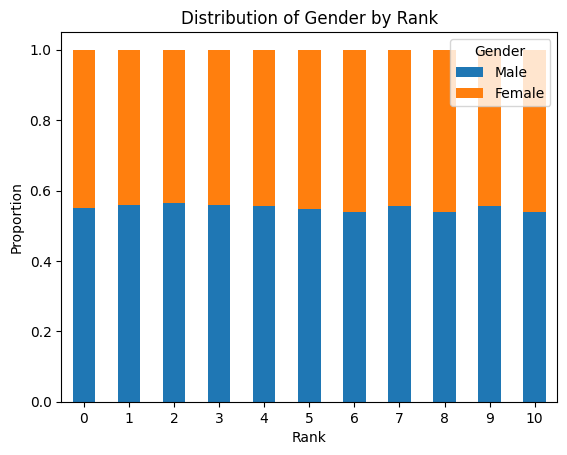

In [119]:
print_feature_distribution(direct_gender,'Gender')

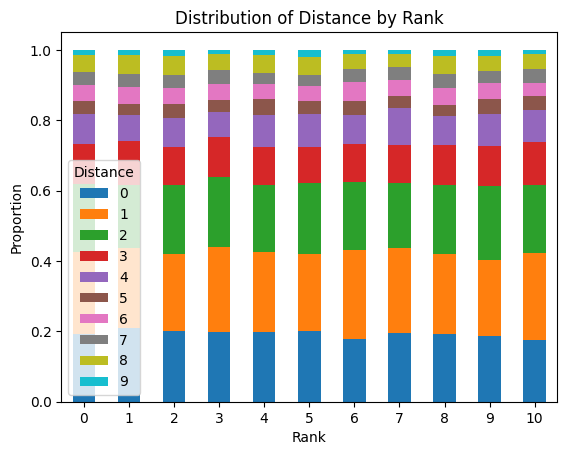

In [120]:
print_feature_distribution(direct_distance_km,'Distance')

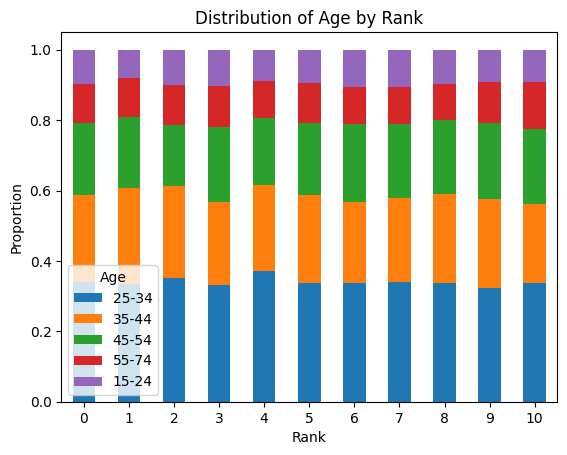

In [121]:
print_feature_distribution(direct_age,'Age')

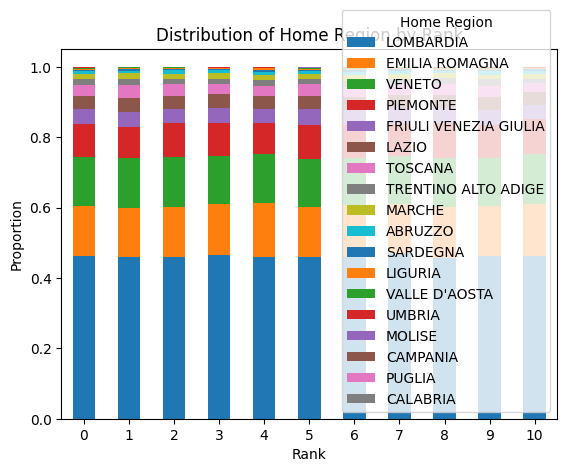

In [122]:
print_feature_distribution(direct_home_region,'Home Region')

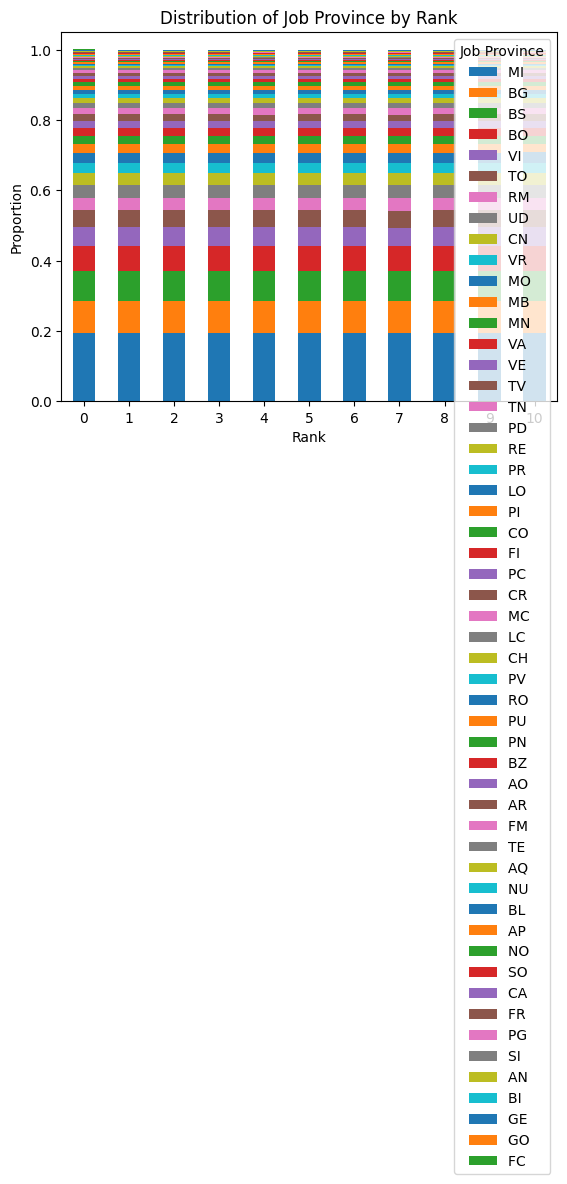

In [123]:
print_feature_distribution(direct_job_province,'Job Province')

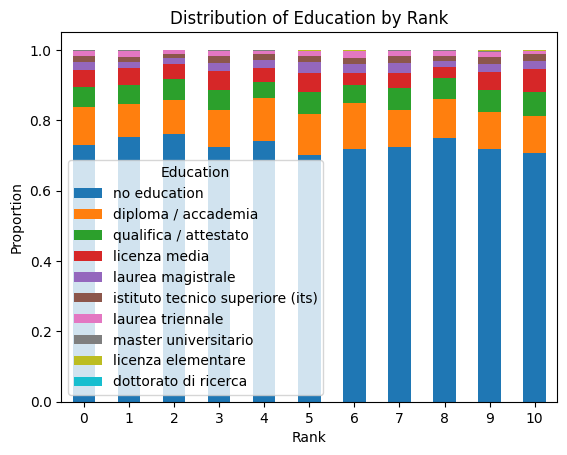

In [124]:
print_feature_distribution(direct_education,'Education')

## Reverse Matching

In [ ]:
reverse_matching_df = pd.read_csv(cwd+'/reverse_matching_20240213.csv', sep=';')
reverse_matching_df.shape

In [ ]:
reverse_matching_df.job_id.nunique(),reverse_matching_df.cand_id.nunique(),

In [ ]:
reverse_matching_df.head()

In [ ]:
reverse_matching_df.describe(include="all")

In [ ]:
print('direct_matching_df shape:',reverse_matching_df.shape)
print('direct_matching_df shape by removing rows with null values:',reverse_matching_df.dropna().shape) #quite a lot. Maybe ask what to do with nulls

In [ ]:
reverse_top_1_cands = get_rank_n_candidates(reverse_matching_df,1)
reverse_top_2_cands = get_rank_n_candidates(reverse_matching_df,2)
reverse_top_3_cands = get_rank_n_candidates(reverse_matching_df,3)
reverse_top_4_cands = get_rank_n_candidates(reverse_matching_df,4)
reverse_top_5_cands = get_rank_n_candidates(reverse_matching_df,5)

In [ ]:
distances_km = reverse_matching_df.distance_km
distances_km = discretize_feature(distances_km)

total_distances = np.sum(distances_km)
reverse_dict_distances = {}
for i in range(10):
  reverse_dict_distances[i] = np.around(distances_km[i]/total_distances,4)
reverse_dict_distances

In [ ]:
reverse_dict_gender = create_dictionary_from_series(reverse_matching_df.cand_gender.value_counts())
reverse_dict_age = create_dictionary_from_series(reverse_matching_df.cand_age_bucket.value_counts())
reverse_dict_domicile_region = create_dictionary_from_series(reverse_matching_df.cand_domicile_region.value_counts())
reverse_dict_job_province = create_dictionary_from_series(reverse_matching_df.job_work_province.value_counts())

In [ ]:
columns = ['cand_gender','cand_age_bucket','cand_domicile_region','job_work_province']
reverse_top_1_dicts = create_dicts_rank_n(reverse_top_1_cands,columns)
reverse_top_2_dicts = create_dicts_rank_n(reverse_top_2_cands,columns)
reverse_top_3_dicts = create_dicts_rank_n(reverse_top_3_cands,columns)
reverse_top_4_dicts = create_dicts_rank_n(reverse_top_4_cands,columns)
reverse_top_5_dicts = create_dicts_rank_n(reverse_top_5_cands,columns)


reverse_full_dicts = [reverse_dict_distances,reverse_dict_gender,reverse_dict_age,reverse_dict_domicile_region,reverse_dict_job_province]

reverse_liston = [reverse_full_dicts,reverse_top_1_dicts,reverse_top_1_dicts,reverse_top_3_dicts,reverse_top_4_dicts,reverse_top_5_dicts]

In [ ]:
reverse_distance_km = create_table_for_feature(reverse_liston,idx=0)
reverse_gender = create_table_for_feature(reverse_liston,idx=1)
reverse_age = create_table_for_feature(reverse_liston,idx=2)
reverse_home_region = create_table_for_feature(reverse_liston,idx=3)
reverse_job_province = create_table_for_feature(reverse_liston,idx=4)

In [ ]:
reverse_gender

In [ ]:
reverse_matching_df.cand_id.nunique(),reverse_matching_df.shape

In [ ]:
reverse_matching_df[reverse_matching_df.cand_id =='7,842,895']#.match_rank.nunique()

In [ ]:
direct_matching_df.cand_education.unique()